<a href="https://colab.research.google.com/github/DipanshuKumar449/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Mobile Price Range Prediction.** 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **By -** Dipanshu Kumar

> (Cohort Azaadi)




# **Project Summary -**

Mobile now a days is one of the most selling and purchasing device. Every day new mobiles with new version and more features are launched. Hundreds and thousands of mobiles are sold and purchased on daily basis.

Therefore, Price estimation and prediction is an important part of consumer strategy as a new product that has to be launched, must have the correct price so that the consumers find it appropriate to buy the product. During the purchase of mobile phones, people fail to make correct decisions due to the non-availability of necessary resources to cross validate the price. To address this issue, we developed different classification models using the data related to different features of a mobile phone. The developed model is then used to predict the price range of the new mobile phones.

The main objective of this work is to find out the relationship between features of a mobile phone and its price range which indicates whether the mobile would be cheap, mid-range, expensive or very expensive. We will be using different classification models to accurately classify the data in correct price ranges.

Based on our dataset, Data prepressing was the first step followed. I have understood the data found that the dataset contains 2000 records of mobile phone information with 21 features which were a mix of categorical and numerical values also the dataset fortunately is not having any null values, got a clear description about the features involved. After that Exploratory Data Analysis and Data Visualization has provided a brief understanding about the relationship present between features and label i.e., the dependent variable also it has given an idea about the features to be selected for the further process.

Heatmap was used to understand the correlation between independent variables, based on which important features were selected. Before fitting the model, Standardization was an important step, it makes the feature values in the data have zero mean and unit variance. While we implement any Machine Learning algorithm it could be a possibility that objective function will not work properly without normalization.

After training and testing was done. I have made the use of Logistic Regression, Naive Bayes, K Nearest Neighbour, Random Forest, XGBoost, Support Vector Machine techniques.Hyperparameter Tuning was also done over some of the models for better accuracy and to reduce overfitting, made the use of Randomizedsearch cross validation to achieve the best parameter. These parameters enhanced the predicting capability of our model.

Checked and compared various matrices and came to conclusion that Logistic Regression is giving the best scores. Also, Tree based models (XGBoost and Random Forest in our case) are by far good performing models while dealing with our dataset because of its ability to stay insulated from the effect of worst performing features and at the same time KNN proven to be the worst for this dataset.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(e.g:- RAM, Internal Memory etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

Importance of Price Prediction

The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile.

Also, Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be and there comes Machine Learning Alogorithms to predict the price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***Knowing The Data***

### Import Libraries

In [44]:

# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import *
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Mobile Price Range Prediction - Dipanshu Kumar/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
print(f'The total number of rows in the datset : {df.shape[0]}')
print(f'The total number of columns in the datset : {df.shape[1]}')

The total number of rows in the datset : 2000
The total number of columns in the datset : 21


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Things understood from the dataset till now.

The dataset, from above understanding consists of 2000 rows and 21 columns with no duplicate and no null values.

## ***Understanding The Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Variables Description:

**Battery_power**: Total energy a battery can store in one time measured in mAh.

**Blue**: Has bluetooth or not.

**Clock_speed**: Speed at which microprocessor executes instructions.

**Dual_sim**: Has dual sim support or not.

**Fc**: Front camera mega pixels.

**Four_g**: Has 4G or not.

**Int_memory**: Internal memory in gigabytes.

**M_dep**: Mobile depth in cm.

**Mobile_wt**: Weight of mobile phone.

**N_cores**: Number of cores of processor.

**Pc**: Primary camera mega pixels.

**Px_height**: Pixel resolution height.

**Px_width**: Pixel resolution width.

**Ram**: Random Access Memory in Megabytes.

**Sc_h**: Screen height of mobile in cm.

**Sc_w**: Screen width of mobile in cm.

**Talk_time**: Longest time that a single battery charge will last when you are talking over phone.

**Three_g**: Has 3G or not.

**Touch_screen**: Has touch screen or not.

**Wifi**: Has wifi or not.

**Price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

### Checking Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#creating list of numerical and categorical columns

numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>5:
    numerical_columns.append(col)
categorical_column=list(set(df.columns)-set(numerical_columns))


In [ ]:
print(numerical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [ ]:
print(categorical_column)

['three_g', 'four_g', 'wifi', 'price_range', 'dual_sim', 'blue', 'touch_screen']


In [ ]:
#Just creating a separate categorical column without including the target variable i.e, price_range

categorical_columns = ['dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g']

### All manipulations that done and insights that is found.

We have created a separate columns for Numerical and Categorical Variables to work accordingly it will help in undersatnding the basic relationship between the features(defined as Categorical and Numerical) and the target variables.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

## **Univariate Analysis**

#### Chart - 1

**Distribution of Target Variable**

In [ ]:
sns.set_palette("pastel")

In [ ]:
#Checking the distribution of the Price_Range
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

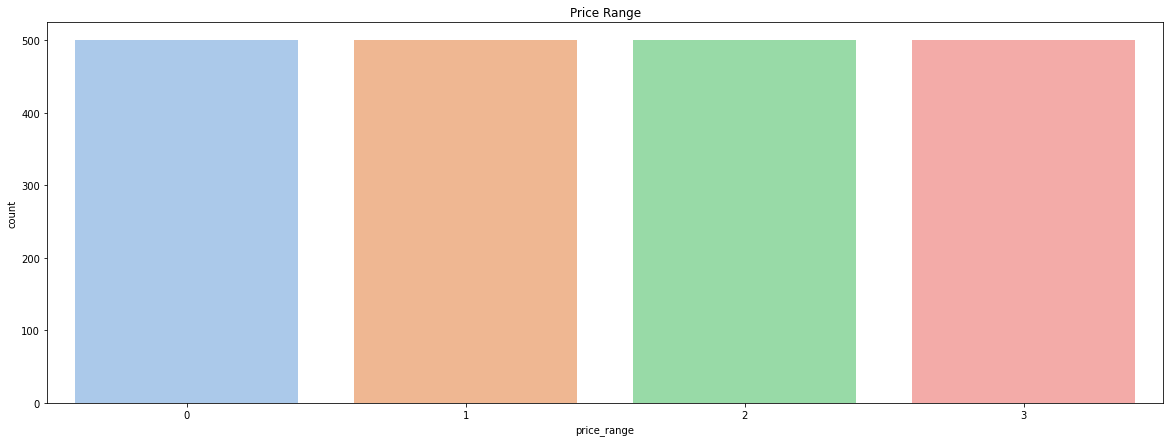

In [ ]:
#Count plot for Price_range distribution
plt.figure(figsize=(20,7))

sns.countplot(df["price_range"]).set_title("Price Range")
plt.show()

##### 1. Why did we pick the specific chart?

The countplot is primarily used to display observational counts in different category-based bins using bars. 
In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars. The basic API and options are identical to those for barplot()

##### 2. What is/are the insight(s) found from the chart?

It is clear from the above graph that our target variable is almost equally distributed among all the price ranges.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since the Target variable is equally distributed in a way that ensures fairness and allows every price range to have the same opportunities means people will buy the mobile phone from any price segmentation ranging from cheap to expensive, so the company can put more focus on performance and durability.

#### Chart - 2

**Distribution of Categorical Features**

In [ ]:
# Value counts for each categorical feature

for count in categorical_columns:
  print(f'{count.title()}\n',df[count].value_counts())
  print("----"*30)

Dual_Sim
 1    1019
0     981
Name: dual_sim, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Wifi
 1    1014
0     986
Name: wifi, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Blue
 0    1010
1     990
Name: blue, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Touch_Screen
 1    1006
0     994
Name: touch_screen, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Three_G
 1    1523
0     477
Name: three_g, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Four_G
 1    1043
0     957
Name: four_g, dtype: int64
-------------------------------------------------------

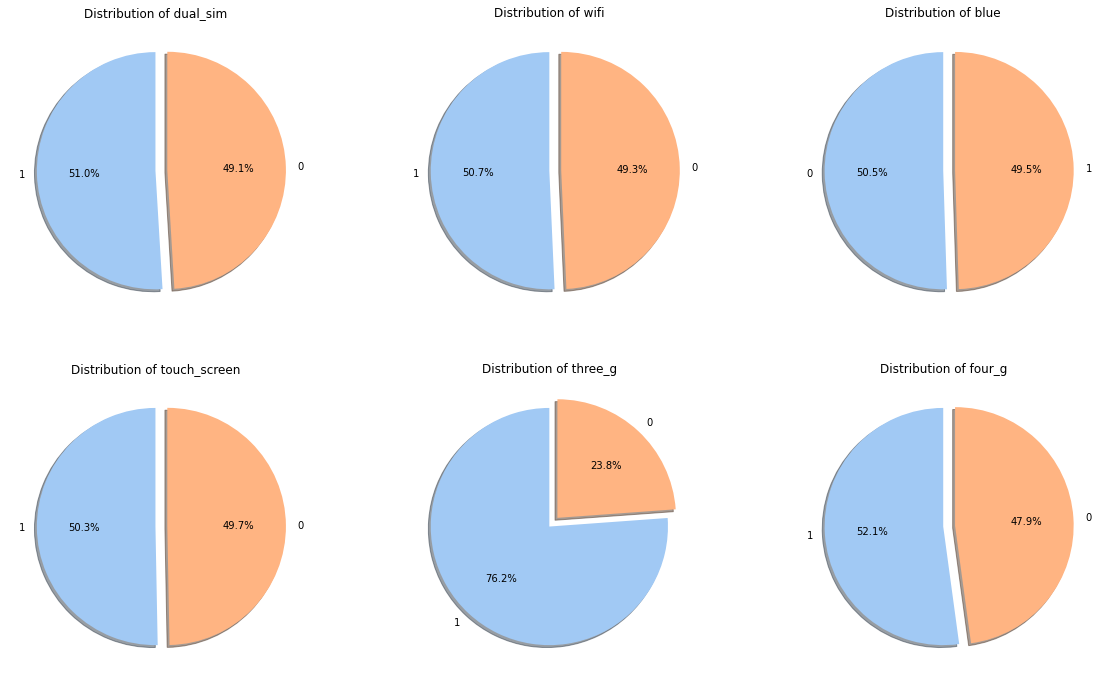

In [ ]:
# Plotting Pie chart for our Categorical columns variables

plt.figure(figsize=(20,12))
count = 0

for feature in categorical_columns:
    
    explode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = explode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_columns[count]}', color = 'black',fontsize = 12)
    count += 1

##### 1. Why did you pick the specific chart?

Firstly by definition a pie chart is a circular statistical chart graph, which is divided into slices to illustrate numerical proportions.

It summarize a large data set into visual form.

Pie charts are easily understood due to its widespread use in business

Pie charts permit a visual check of the reasonableness or accuracy of the calculation.

Pie charts are visually simpler than other types of graphs.

##### 2. What is/are the insight(s) found from the chart?

Every categorical feature shows a similar trend of almost equal class distribution except for the 3G which highlights this fact that most of the mobile phones nowadays contains atleast a 3G sim slot.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Considering the above insight we can say that 3G,4G and upcoming advanced generation boosts the usage of mobile data services and provides a competitive and sustainable business model for the operators and the companies have understood this fact and they try to implement the possible available technologies.

#### Chart - 3

**Distribution of Numerical Columns**

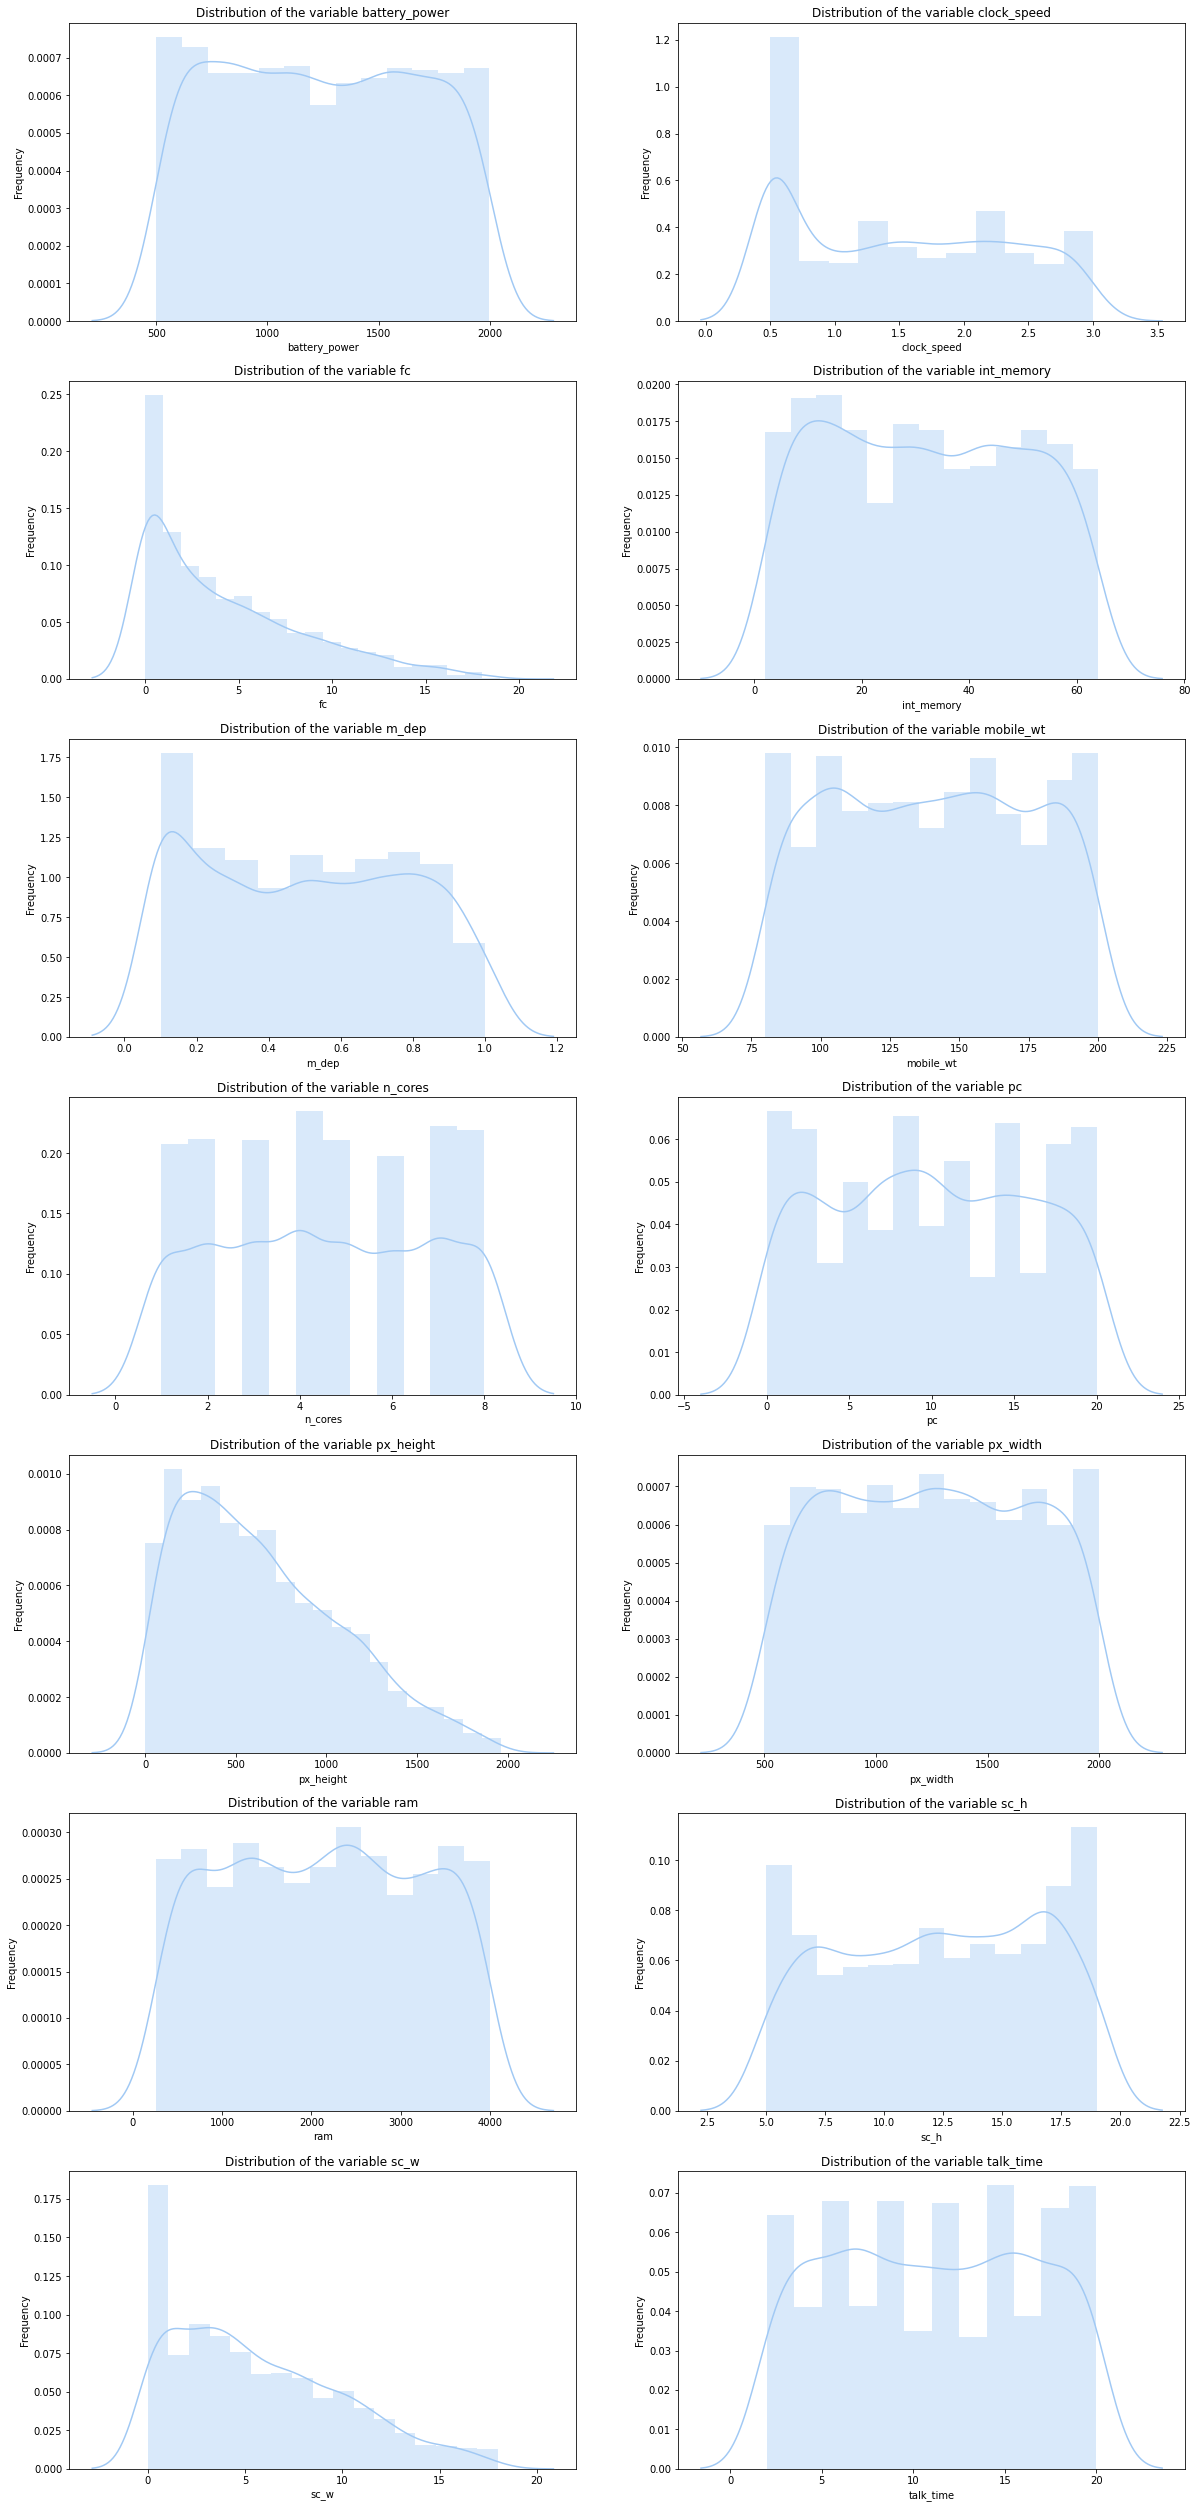

In [ ]:
# Distribution of the Numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Frequency")
  count += 1
     

##### 1. Why did you pick the specific chart?

Reason behind choosing  distplot, as it depicts the variation in the data distribution and gives a brief insight about the skewness, from which we can make decision regarding transformation to be done or not.

##### 2. What is/are the insight(s) found from the chart?

Many numerical features are showing almost normal distribution

*   Many numerical features are showing almost normal distribution

*   Some numerical features like fc, px_height and sc_w are also showing positive skewness.





> We are putting this much focus on normal distribution due to these specific reasons.

*   It has one of the important properties called central theorem. Central theorem means relationship between shape of population distribution and shape of sampling distribution of mean. This means that sampling distribution of mean approaches normal as sample size increase.
*   In case the sample size is large the normal distribution serves as good approximation.
*   Due to its mathematical properties it is more popular and easy to calculate.
*   It is used in statistical quality control in setting up of control limits.
*   The whole theory of sample tests t, f and chi-square test is based on the normal distribution.









##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


Deciding the price point for products or services is easier against a bell curve. This can help us visualise how our prices compare to similar products in the current market and ensure the prices are competitive.

## **Bivariate Analysis**

#### Chart - 4

**Distribution of Categorical Features with the Target varibale i.e, Price Range** 

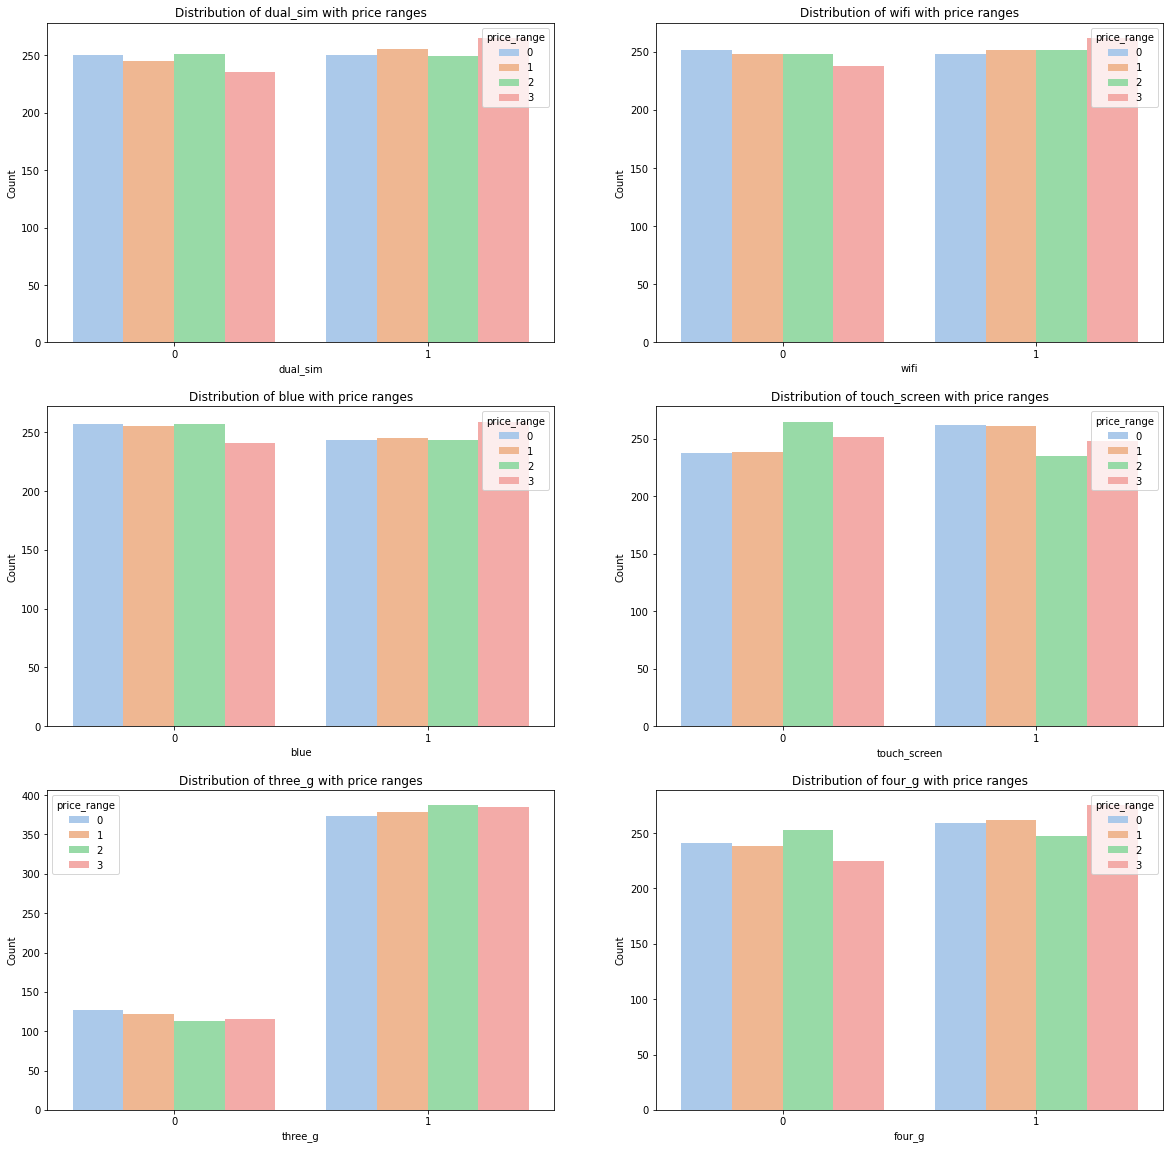

In [ ]:
#Distribution of Categorical Columns vs Price Range
count = 1
plt.subplots(figsize=(20,20))
for feature in categorical_columns:
  plt.subplot(3,2,count)
  sns.countplot(df[feature], hue = df['price_range'])
  plt.title(f"Distribution of {feature} with price ranges", fontsize=12)
  plt.xlabel(f"{feature}")
  plt.ylabel("Count")
  count += 1

##### 1. Why did you pick the specific chart?

The reasons are same as above, the countplot is primarily used to display observational counts in different category-based bins using bars. In simple words a count plot can be thought of as a histogram across a categorical, instead of quantitative, variable it provides observations in each categorical bin using bars.

This function i.e, countplot() always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

##### 2. What is/are the insight(s) found from the chart?

All the categorical variables namely 'dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g'  have a  similar count of data for each classes which ranges mostly in between 230 -260(almost)except the variable 'three_g'

In 'three_g' there are very few number of mobiles which doesn't support 3G across all the price ranges.And the number of mobile phones that supports 3G(comparing to mobiles not having 3G) ranges more than 350.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile prices are volatile; understanding how the a price changes with categorical variables can help in identifying the best-price for the production needs. This can also help reducing expenditures as it enables the company to assess where the price falls in relation to the market average or not.

#### Chart - 5

**Distribution of Numerical Features with the Target varibale i.e, Price Range**


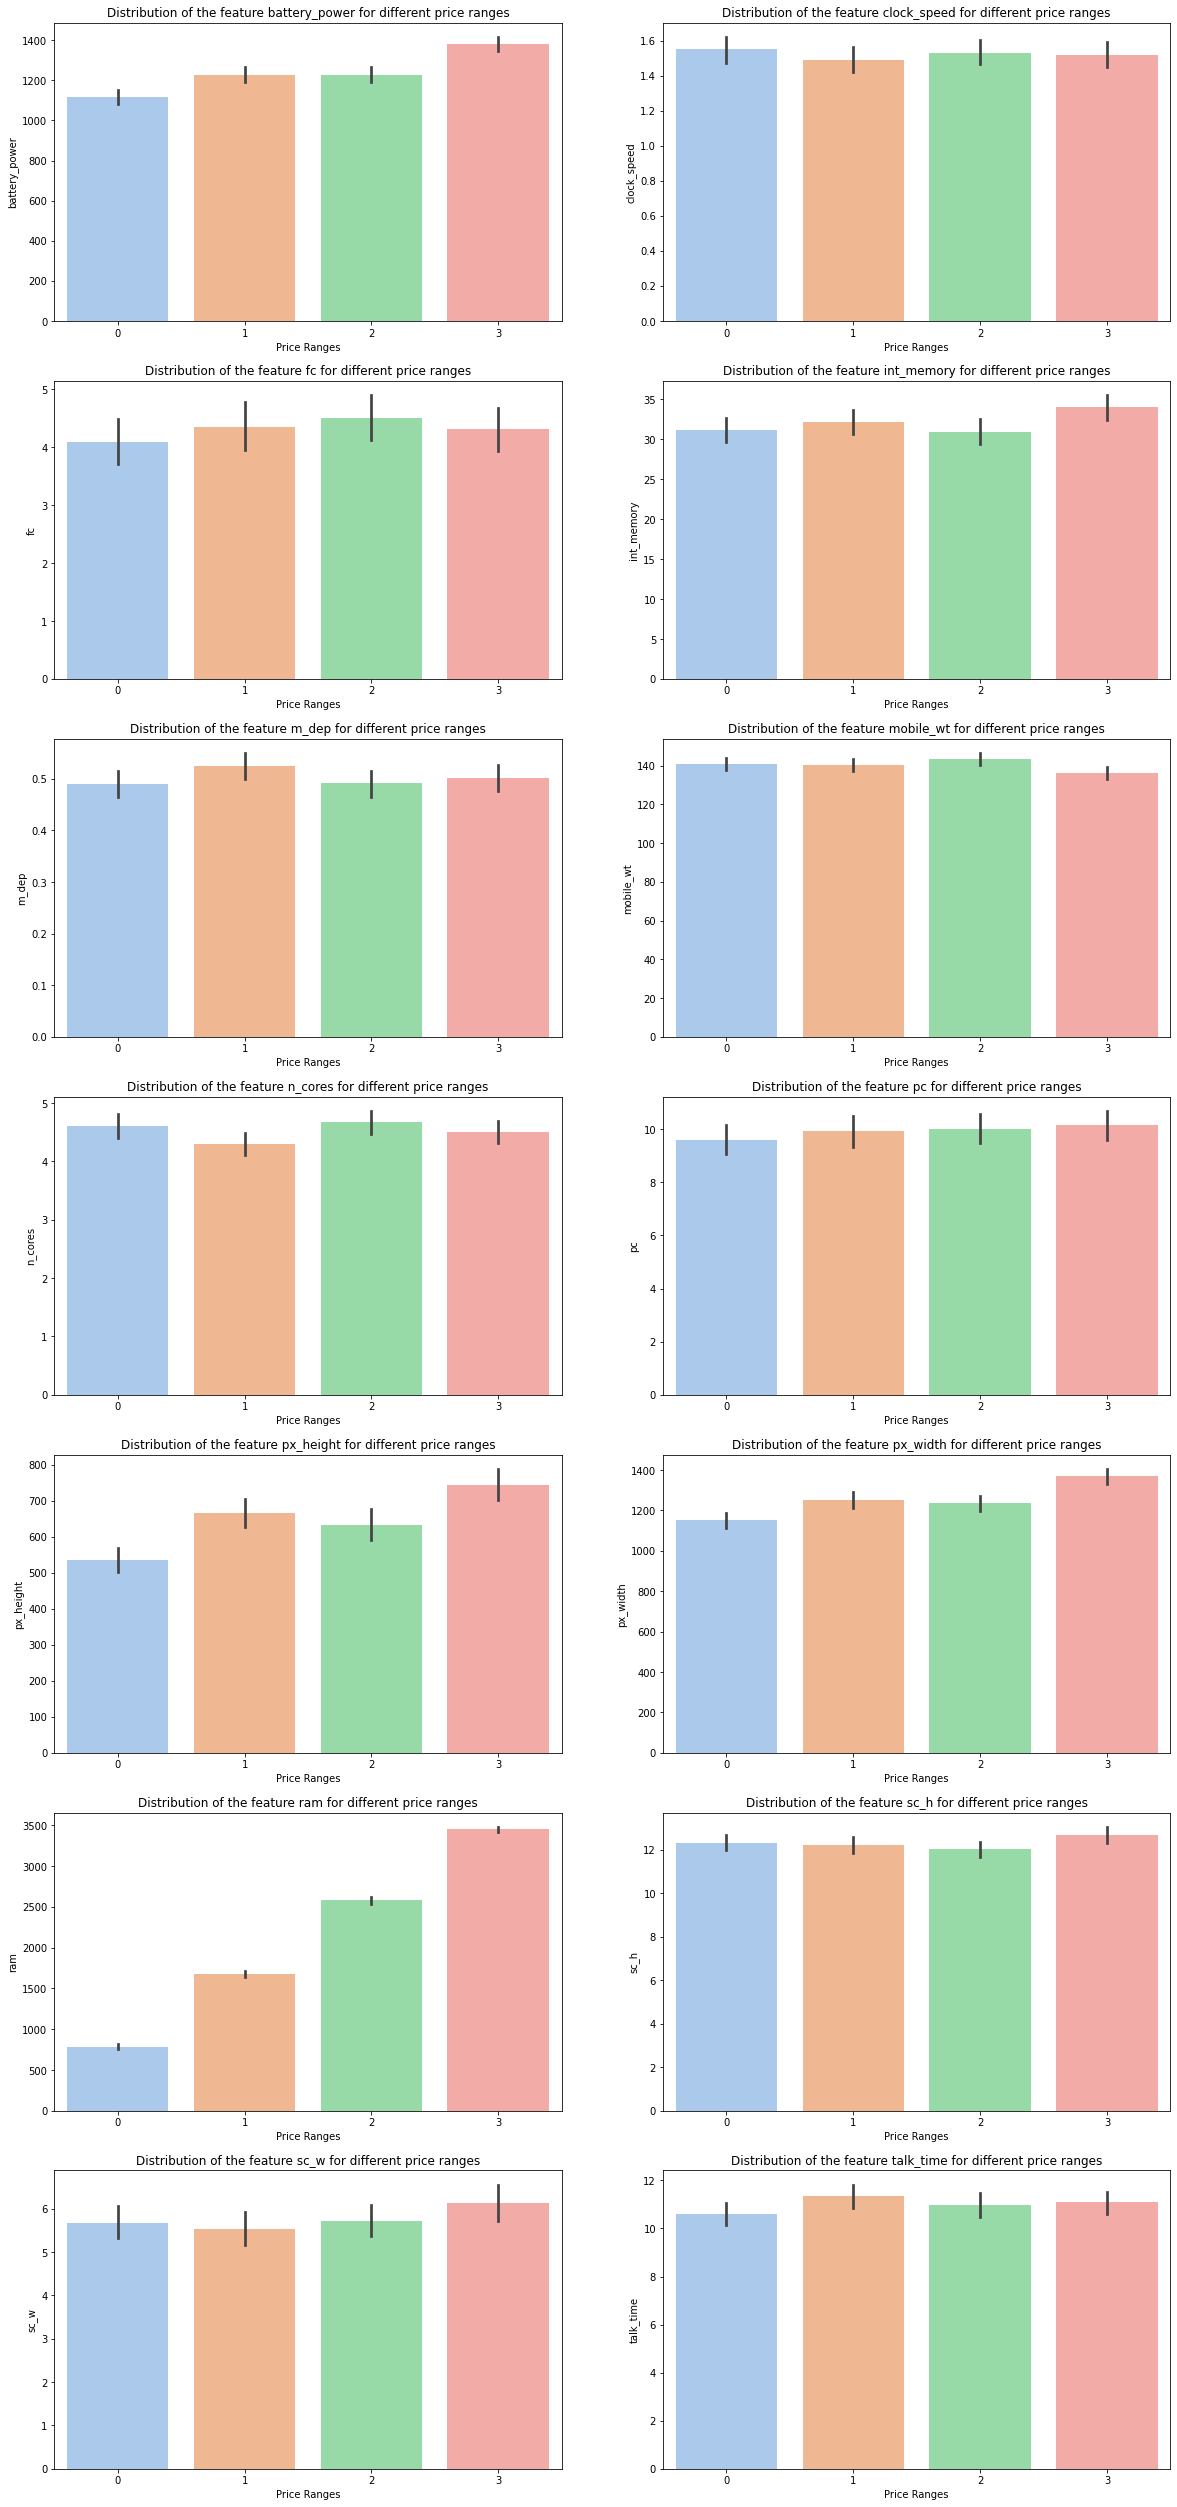

In [ ]:
#Distribution of Numerical Columns VS Price Range
count = 1
plt.subplots(figsize=(20,45))
for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.barplot(y = df[feature], x = df['price_range'])
  plt.title(f"Distribution of the feature {feature} for different price ranges", fontsize=12)
  plt.xlabel("Price Ranges")
  plt.ylabel(f'{feature}')
  count += 1

##### 1. Why did you pick the specific chart?


> The following reasons lead us to use Bar plot.

Bar plots are used with numerical or categorical data.
It summarises the large set of data in simple visual form.
Also it displays each category of data in a frequency distribution.

Large data can be easily summarized in visual form.

It displays relative numbers of multiple categories.
Large data set in the visual form helps us to clarify trends better than tables.

Estimates key values at a glance and displays close numbers or proportions outline.

##### 2. What is/are the insight(s) found from the chart?

Considering the Relation of Numerical Features with the Target varibale i.e, Price Range a similar kind of distribution is observed for every price range still we have some exceptional features.

For instance, we see a similar distribution considering 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', ' 'sc_h', 'sc_w', 'talk_time' features are not linearly related with the price range which means that it is not necessary that if the price increases there will be an increase in these values.

At the same time some of very important features like Battery Power and specially RAM increase with the increase in price range. This indicate that RAM is a very important feature in predicting the price_range in which the mobile phone lies.

Every feature whether it is increasing or decreasing with the price will contribute towards the mobile price prediction.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These type of distribution can help a company determine fair and profitable business contracts. This is because it allows us to analyse whether an offer of goods or services(mobile price in our case) is being tendered at a price below or above the industry average.

## **Multivariate Analysis**

#### Chart - 6

**Distribution of camera placement i.e front,primary or both vs megapixels.**

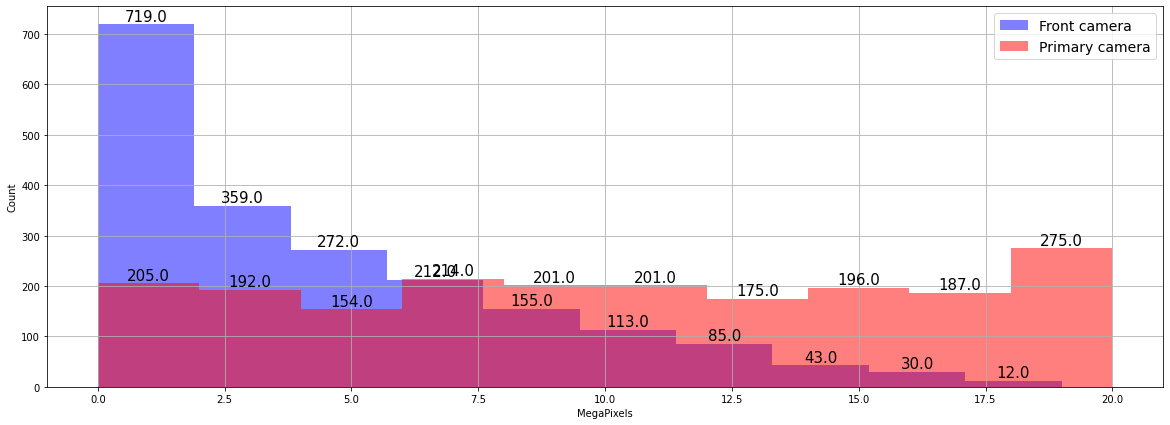

In [ ]:
# Histogram determining the number of mobiles present based on its camera placement i.e, front,primary or both vs megapixel

plt.figure(figsize=(20,7))
ax = df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend(fontsize=14)
plt.xlabel('MegaPixels')
plt.ylabel('Count')

# Adding annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

The basic reason of using Histogram is that it is one of the most popular and 
commonly used devices for charting continuous frequency distribution. A single glance at a histogram gives us some idea about the shape and spread of the data.

One of the main advantages of a histogram are its simplicity and versatility. It can be used in many different situations to offer an insightful look at frequency distribution.





##### 2. What is/are the insight(s) found from the chart?

Above chart shows that our dataset contains most of the mobile phones having front camera with very low megapixels.

But the primary camera is present in almost all the mobile phones.

Intrestingly the overlap of Front and primary camera over megapixel shows a slight postive skewness(represented by violet colored histogram).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One intution we can make by considering the fact that Modern smartphones take pictures and video that are sufficient for the demands of even pro consumers, bussinesse can work over various software development to be done in the same device, making the typical photo touching or video creative that can lead to attact more and more customers.

#### Chart - 7

**Distribution of RAM vs Price_Range on the based on presence of Touch Screen or Not**

<Figure size 1440x504 with 0 Axes>

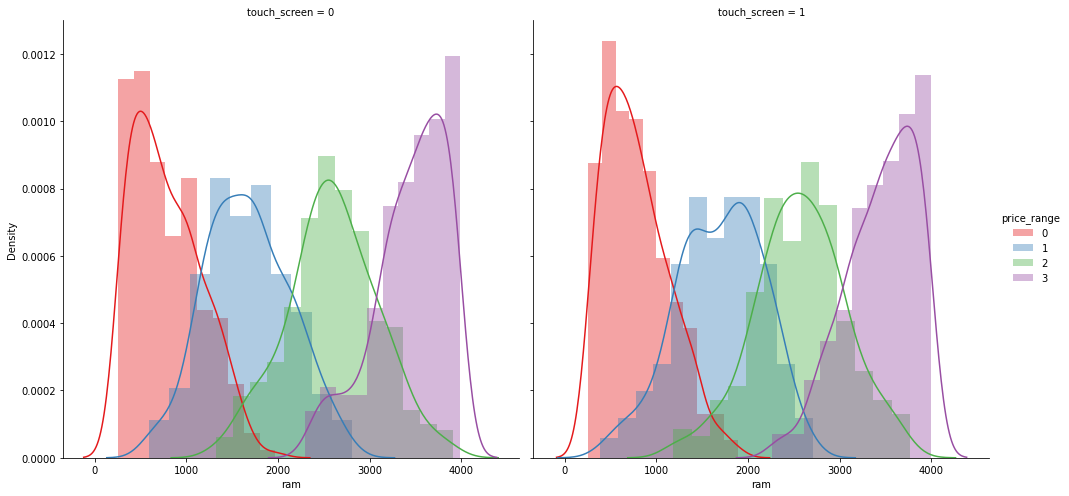

In [ ]:
# Distribution plot determining the Distribution of RAM vs Price_Range on the based on presence of Touch Screen or Not.

plt.figure(figsize=(20,7))
Touch_ram = sns.FacetGrid(df, col="touch_screen", hue="price_range", palette="Set1",height = 7)                   
Touch_ram = (Touch_ram.map(sns.distplot, "ram").add_legend())
plt.show()

##### 1. Why did you pick the specific chart?

Facet_Grid() is used to forms a matrix of panels defined by row and column variables. It is most useful when we have discrete variables, and all combinations of the variables exist in the data.
It helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of the dataset using multiple panels.

##### 2. What is/are the insight(s) found from the chart?

Firstly we observe that whether the mobile is touch screen or not, the RAM distribution is almost the same for different price ranges.

The trend shows an obvious gesture that lower the ram, less is the price but the number of mobile phone sold are also higher for this price segment.

One another finding suggest that people are also interested in buying Expensive Mobile phone to get a better RAM performance.(Because price shows a direct proportionality with RAM)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One of the main objectives of a company is to maximize the performance and speed without increasing complexity and overall costs.RAM provides a much faster and stable experience for end users, a better RAM management based on the price range helps the company to compete in the market.

#### Chart - 8 - Correlation Heatmap

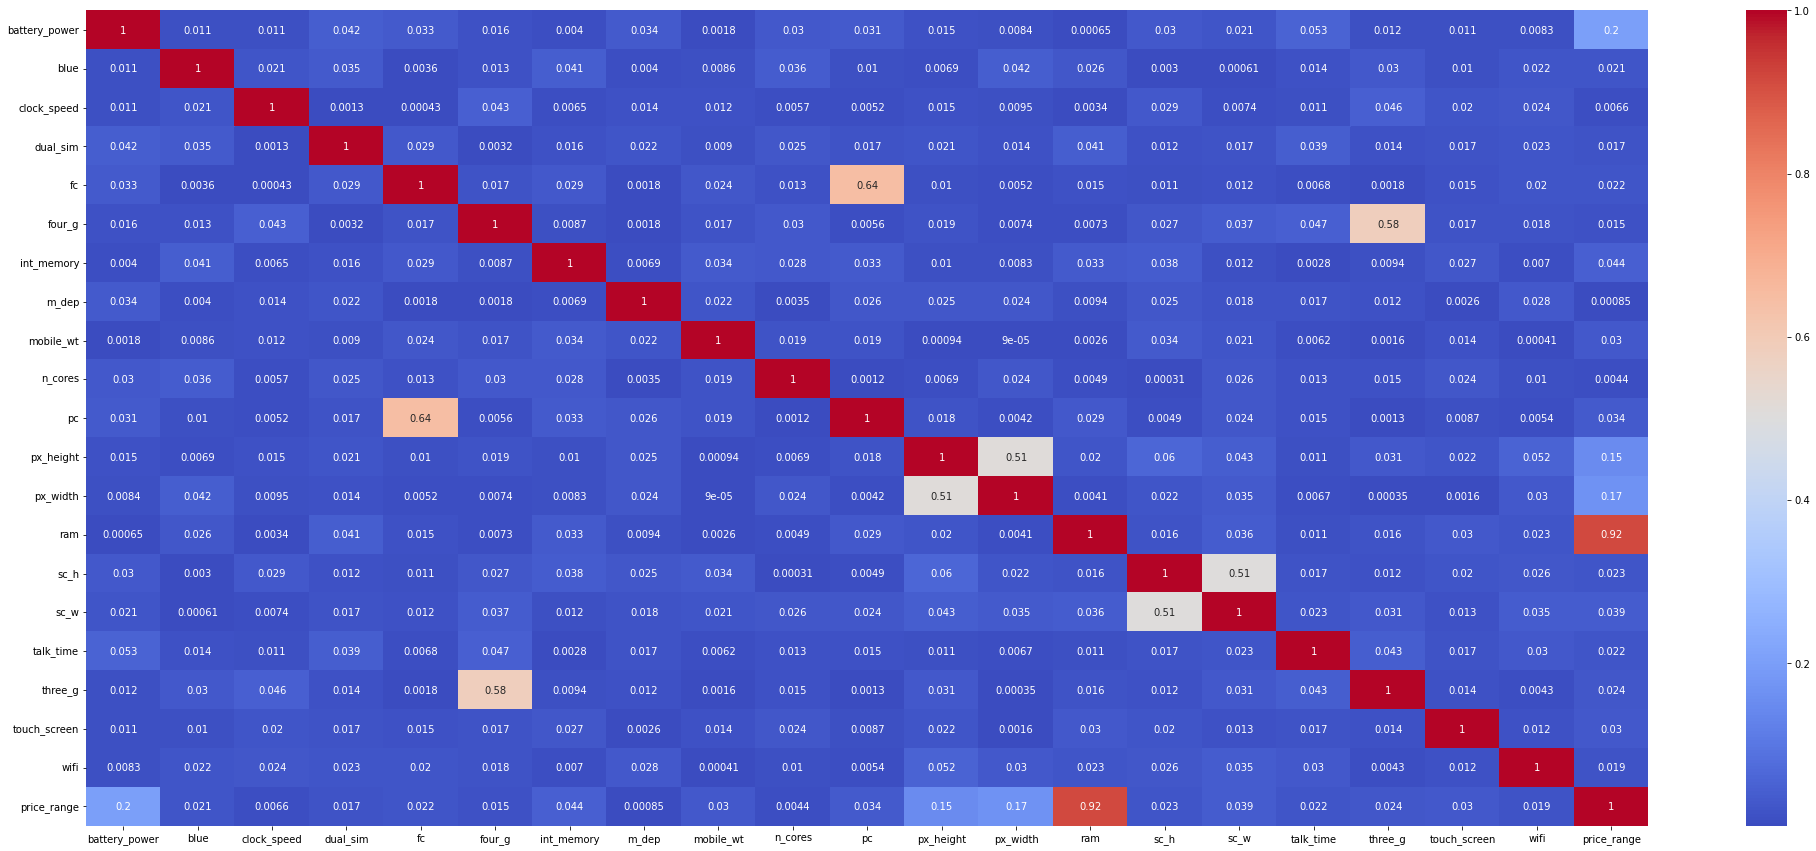

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(35,15))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:


*   Heatmaps give an instant overview of key web performance parameters.
*   Heatmaps provide a visual approach to understanding numeric values.

*   Heatmaps help companies make informed choices that improve the bottom line.
*   It also helps in understanding the multicollinearity based on to which we can decide which feature to be kept and which is to be removed or combined.





##### 2. What is/are the insight(s) found from the chart?


*   Most of the independent variables are not strongly correlated to each other, hence we do not need to eliminate any of these features.

*   RAM is the only feature highly correlated with the target variable which means RAM is a strong predictor for the price range variable.

*   Front camera and primary camera are moderatly correlated with each other having a correlation value of 0.64.
*   Similarly three_g and four_g are also moderatly correlated with each other with a value of 0.58 which is a bit convincing that now a days mobile phone comes with both 3G and 4G support.








**Using VIF to cross check multicollinearity for all the columns to get the best features selected**

In [ ]:
#Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.columns if i not in ["price_range"]]])  #calling the vif function

,variables,VIF
0,battery_power,8.076717
1,blue,1.981927
2,clock_speed,4.260479
3,dual_sim,2.015006
4,fc,3.413529
5,four_g,3.194321
6,int_memory,3.961239
7,m_dep,3.911115
8,mobile_wt,12.972548
9,n_cores,4.646070


A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.

A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

In our case, we haven't seen any high VIF value and every features is having its own importance so droping any column may effect the overall output.

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Most of the Mobile phones in the higher price range i.e, in 2nd and 3rd category is having an average RAM of atleast 2048 MB(2GB).
2. Most of the Mobile phones in the lower price range i.e, in 0 and 1st category is having an average battery life of atmost 1200 mAh.
3. The Mobile phones in the price segment of 1st and 2nd is having an average internal memory of 32 GB.

Creating a Class for calculation the parameters

In [ ]:
# Parameter class

class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
# Calculating Variance and Z distribution

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)

Creating a function to calculate P-value

In [ ]:
# function to calculate p value

def p_value(z,tailed):
  z = zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

Function to give conclusion about the Hypothesis based on P-value

In [ ]:
# Conclusion about P-value

def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected for p = {p}"

In [ ]:
# Initializing the class
findz = findz()

### Hypothetical Statement - 1

Most of the Mobile phones in the higher price range i.e, in 2nd and 3rd category is having an average RAM of atleast 3072 MB(3GB).






#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 2048

Alternate Hypothesis : N < 2048

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value

hypo_1 = df[(df["price_range"] != 0) & (df["price_range"] != 1)]

# Getting the required parameter values for hypothesis testing

hypothesis_number = 3072

sample_mean = hypo_1["ram"].mean()

size = len(hypo_1)

std = (variance(hypo_1["ram"]))**0.5

In [69]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='l')

# Getting Conclusion

print(conclusion(p))

Null Hypothesis rejected for p = 0.002243374808424045


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Most of the Mobile phones in the higher price range i.e, in 2nd and 3rd category is not having an average RAM of atleast 3072 MB(3GB).

##### Why did you choose the specific statistical test?

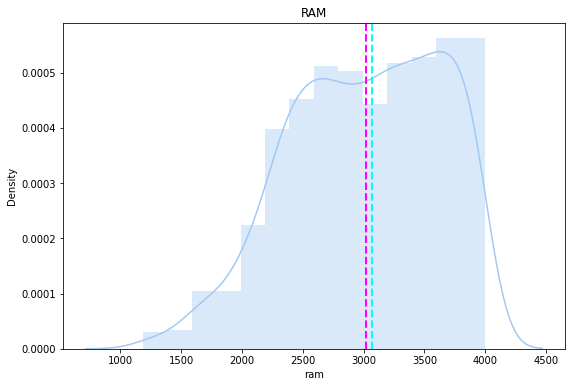

In [59]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["ram"])
sns.distplot(hypo_1["ram"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("RAM")
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it 
is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2

Most of the Mobile phones in the lower price range i.e, in 0 and 1st category is having an average battery life of atmost 1200 mAh.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 1200

Alternate Hypothesis : N > 1200

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

hypo_2 = df[(df["price_range"] != 2) & (df["price_range"] != 3)]

# Getting the required parameter values for hypothesis testing

hypothesis_number = 1200

sample_mean = hypo_2["battery_power"].mean()

size = len(hypo_2)

std = (variance(hypo_2["battery_power"]))**0.5

In [61]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='r')

# Getting Conclusion

print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.9773318240969374.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Most of the Mobile phones in the lower price range i.e, in 0 and 1st category is having an average battery life of atmost 1200 mAh

##### Why did you choose the specific statistical test?

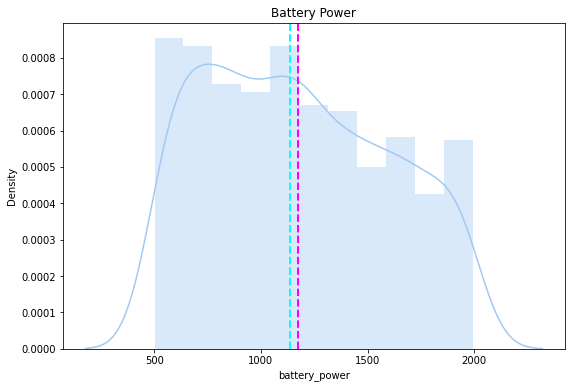

In [62]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["battery_power"])
sns.distplot(hypo_2["battery_power"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Battery Power")
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it 
is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3

The Mobile phones in the price segment of 1st and 2nd is having an average internal memory of 32 GB.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 32

Alternate Hypothesis : N != 32

Test Type: Two Tailed Test

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

hypo_3 = df[(df["price_range"] != 0) & (df["price_range"] != 3)]

# Getting the required parameter values for hypothesis testing

hypothesis_number = 32

sample_mean = hypo_3["int_memory"].mean()

size = len(hypo_3)

std = (variance(hypo_3["int_memory"]))**0.5

In [64]:
# Getting Z value

z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value

p = p_value(z = z, tailed='d')

# Getting Conclusion

print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.402925624572386.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and The Mobile phones in the price segment of 1st and 2nd is having an average internal memory of 32 GB

##### Why did you choose the specific statistical test?

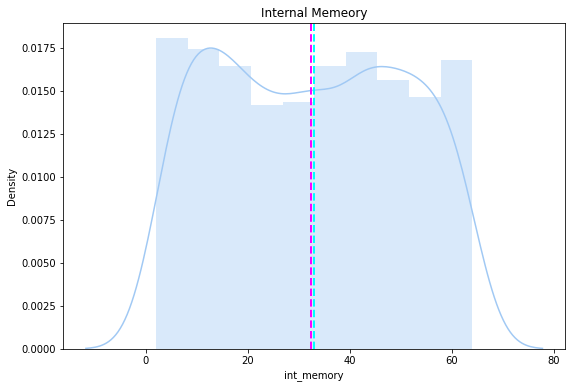

In [65]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax = fig.gca()
feature= (hypo_1["int_memory"])
sns.distplot(hypo_1["int_memory"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Internal Memeory")
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it 
is a Normal Distribution. That's why I have used Z-Test directly.

## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

Fortunately our dataset contains no missing values

###Handling Outliers


**Checking Outliers for Numerical Columns.**

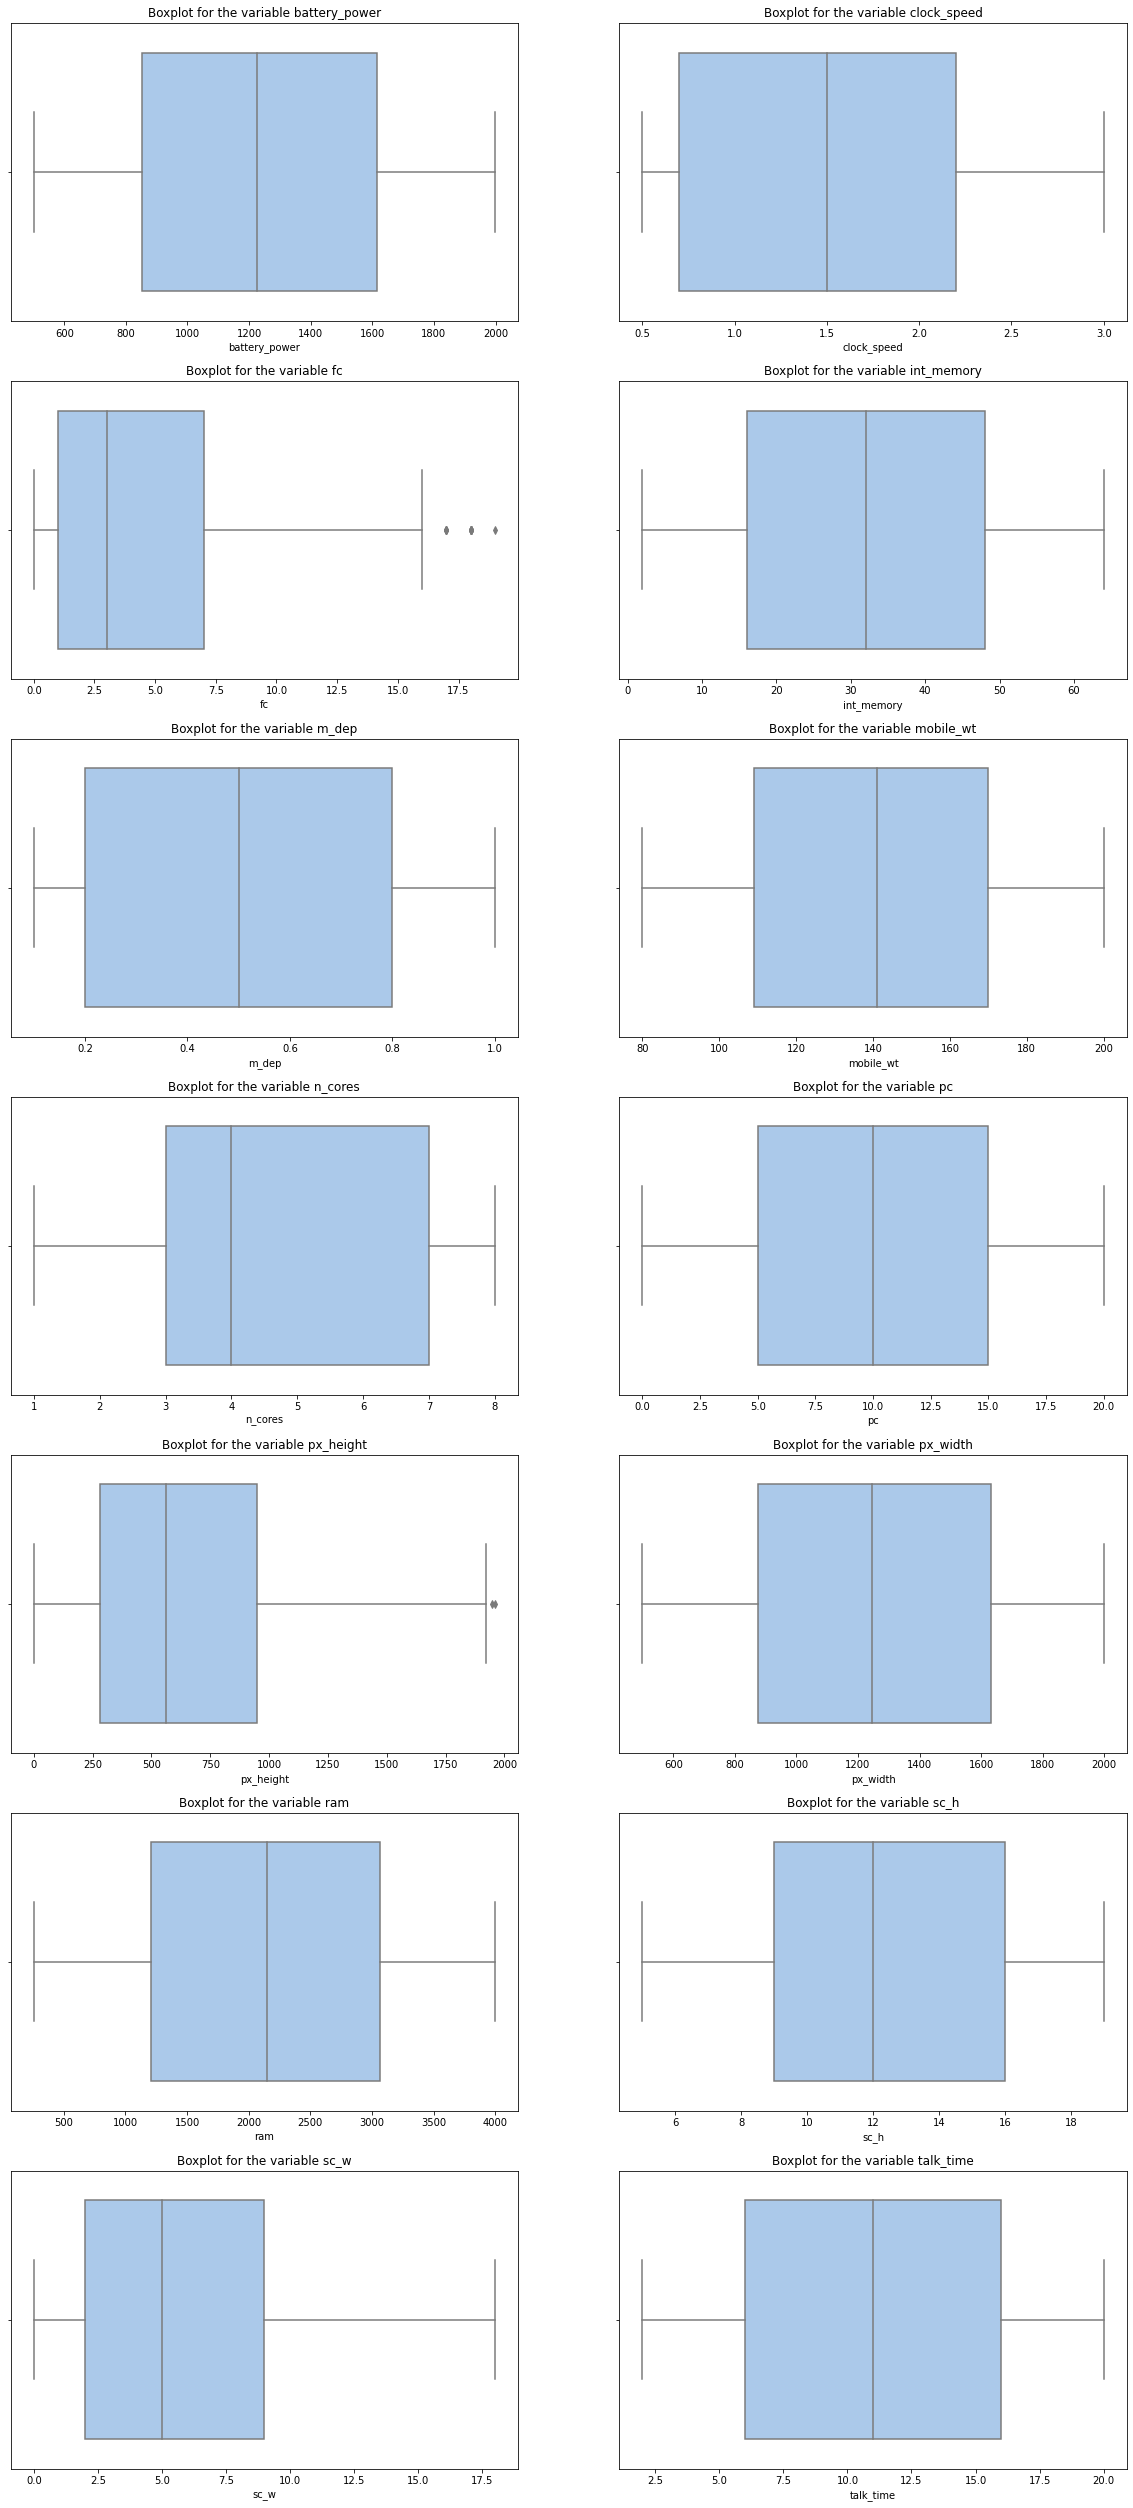

In [ ]:
# Boxplots for checking outliers in numerical features

count = 1
plt.subplots(figsize=(20,45))

for feature in numerical_columns:
  plt.subplot(7,2,count)
  sns.boxplot(df[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize=12)
  plt.xlabel(f"{feature}")
  count += 1

Reason for choosing Box plots is that thay are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph. Box plot allow for comparison of data from different categories for easier, more effective decision-making because of its quality to display the outliers.

##### What all outlier treatment techniques that were used and why these techniques are used?

The boxplots gave an insight that every single numerical feature(except two features) is well distributed with no outliers present but there are outliers in fc and px_height but we won't treat any value as outlier here because somewhat these values seems to be realistically to have in different kinds of mobiles available in the market.



### Feature Manipulation & Selection

####Feature Manipulation

Since each and every feature is having its own importance so we are not droping any of the features and considering these for the implementation of Machine learning Models.

#### Feature Selection

In [ ]:
# Selecting the features wisely

print('The Categorical Features selected are: ', categorical_columns)
print('The Numerical Features selected are: ', numerical_columns)

The Categorical Features selected are:  ['dual_sim', 'wifi', 'blue', 'touch_screen', 'three_g', 'four_g']
The Numerical Features selected are:  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


##### What all feature selection methods that have been used  and why?

We have made the use of Correlation Heatmap because it finds potential relationships between variables and to understand the strength of these relationships.

Also VIF i.e, Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error.

And Boxplot beacause they are very effective and easy to read, as they can summarize data from multiple sources and display the results in a single graph.

###Data Transformation

In [ ]:

# creating the set of dependent and independent variables
X = df.drop(labels='price_range', axis=1)
Y = df['price_range']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

The Number of Rows and Columns in X is (2000, 20) respectively.
The Number of Rows and Columns in Y is (2000,) respectively.


###Data Splitting

In [ ]:
# Spliting the data to train and test.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)
                                                    

In [ ]:
# Getting the shape of Train Test set.

print("Training Dataset Shape")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print("----"*10)
print("Testing Dataset Shape")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

Training Dataset Shape
X_train shape  (1600, 20)
Y_train shape  (1600,)
----------------------------------------
Testing Dataset Shape
X_test shape  (400, 20)
Y_test shape  (400,)


##### What data splitting ratio that is been used and why? 

We have made the use of 80% and 20% Traning and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the amount of data we have. If the data is too small then no split will give satisfactory variance so we'll have to do cross-validation but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

**Feature Scaling**

In [ ]:
#importing standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)                     
X_test = scaler.transform(X_test)

## ***ML Model Implementation***

**Creating a Function for evaluation of Models.**

In [ ]:
# Creating a function to calculate the metrics for evaluating the performance of models.

def evaluation_model(y_actual,y_pred):

  '''
  This function will calculate  diffrent metrics for evaluating 
  the perfomance of models
  '''
  list_of_scores=[]
  #Accuracy 
  Accuracy =  accuracy_score(y_actual,y_pred)
  print(f'Accuracy : {Accuracy}')
    
  #Recall
  Recall  = recall_score(y_actual,y_pred,average='weighted')
  print(f"Recall : {Recall}")

  #precision
  Precision = precision_score(y_actual,y_pred,average='weighted')
  print(f"Precision : {Precision}")
 
  #f1 score
  F1 = f1_score(y_actual,y_pred,average='weighted')
  print(f"F1 : {F1}")


**Creating a Function for Confusion Matrix**

In [ ]:
# Creating a function for understanding the confusion matrix.

def confuse_matrix(actual, predicted):
  labels = ['0','1','2','3']
  cm = confusion_matrix(actual, predicted)
  print(cm)

  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax)

  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  

### ML Model - 1

## **Implementing Logistic Regression Model**

In [ ]:
# logistic regression implementation

print(".....LOGISTIC REGRESSION.....")
print('\n')

log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

log_reg_pred_train = log_reg.predict(X_train)   # Prediction for train dataset
log_reg_pred_test = log_reg.predict(X_test)     # Prediction for test dataset


.....LOGISTIC REGRESSION.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.975625
Recall : 0.975625
Precision : 0.9755900316945153
F1 : 0.9755884757691508


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.975
Recall : 0.975
Precision : 0.9759457776352783
F1 : 0.9750198554444309


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[391   4   0   0]
 [  8 394   7   0]
 [  0   7 393   8]
 [  0   0   5 383]]


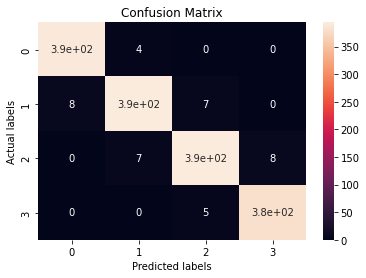

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[101   4   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


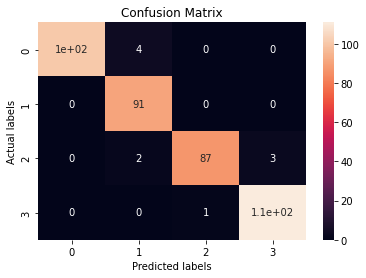

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for Logistic Regression

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,log_reg_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,log_reg_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,log_reg_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,log_reg_pred_test)
plt.figure()
plt.show()

### ML Model - 2

## **Implementing Naive Bayes**

In [ ]:
# Naive Bayes implementation
from sklearn.naive_bayes import GaussianNB

print(".....NAIVE BAYES.....")
print('\n')

NB = GaussianNB()
NB.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

NB_pred_train = NB.predict(X_train)   # Prediction for train dataset
NB_pred_test = NB.predict(X_test)     # Prediction for test dataset



.....NAIVE BAYES.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.819375
Recall : 0.819375
Precision : 0.821118094404913
F1 : 0.8201611420871642


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.7975
Recall : 0.7975
Precision : 0.8061315603629521
F1 : 0.7994215832283195


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[355  40   0   0]
 [ 29 308  72   0]
 [  0  70 301  37]
 [  0   1  40 347]]


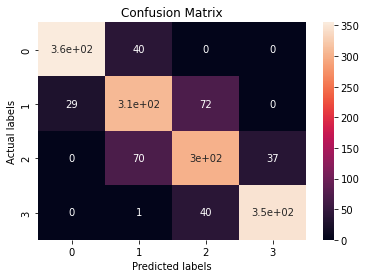

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[95 10  0  0]
 [10 62 19  0]
 [ 0  9 71 12]
 [ 0  0 21 91]]


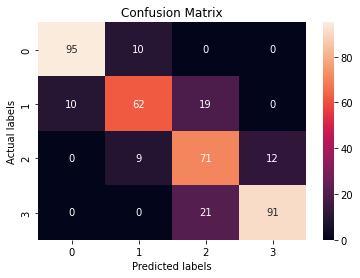

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for Naive Bayes

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,NB_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,NB_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,NB_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,NB_pred_test)
plt.figure()
plt.show()

### ML Model - 3

## **Implementing KNN Model**
(with Hyperparameter Tuning)

In [ ]:
# KNN implementation
from sklearn.neighbors import KNeighborsClassifier


print(".....KNearestNeighbour.....")
print('\n')

KNN = KNeighborsClassifier()

KNN.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

KNN_pred_train = KNN.predict(X_train)   # Prediction for train dataset
KNN_pred_test = KNN.predict(X_test)     # Prediction for test dataset

.....KNearestNeighbour.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.696875
Recall : 0.696875
Precision : 0.7083170669670105
F1 : 0.6975140516486232


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.53
Recall : 0.53
Precision : 0.5697617659113206
F1 : 0.5407070510069412


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[335  53   7   0]
 [ 95 268  36  10]
 [ 30  99 253  26]
 [  2  30  97 259]]


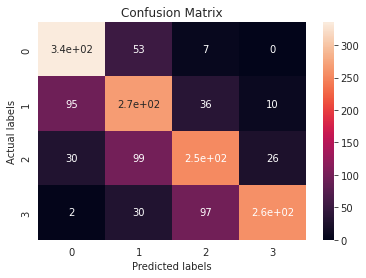

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[76 24  5  0]
 [25 41 22  3]
 [ 6 41 34 11]
 [ 2 13 36 61]]


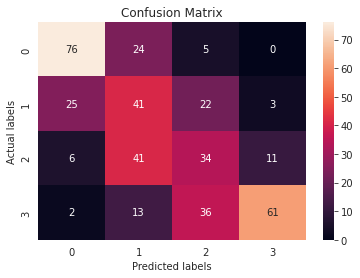

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for KNN

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,KNN_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,KNN_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,KNN_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,KNN_pred_test)
plt.figure()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)

# Selecting Hyperparameters
params_dict = {
              'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                'leaf_size': [20,25,30,35,40,45,50]
              }

# Using Randomized Search CV
KNN_model = RandomizedSearchCV(estimator = KNN,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

KNN_model.fit(X_train,Y_train)

print(KNN_model.best_estimator_)    # Getting the best Estimator
print("\n")
KNN_optimal = KNN_model.best_estimator_


# Predictions of Training and Testing Dasets

KNN_pred_train = KNN_optimal.predict(X_train)   # Prediction for train dataset
KNN_pred_test = KNN_optimal.predict(X_test)     # Prediction for test dataset

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................leaf_size=50, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=50, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=50, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=50, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=50, n_neighbors=8; total time=   0.0s
[CV] END ........................leaf_size=20, n_neighbors=6; total time=   0.0s
[CV] END ........................leaf_size=20, n_neighbors=6; total time=   0.0s
[CV] END ........................leaf_size=20, n_neighbors=6; total time=   0.0s
[CV] END ........................leaf_size=20, n_neighbors=6; total time=   0.0s
[CV] END ........................leaf_size=20, n_neighbors=6; total time=   0.0s
[CV] END ........................leaf_size=45, n_neighbors=7; total time=   0.0s
[CV] END ........................leaf_size=45, n

##### The hyperparameter optimization technique that is used and why?

RandomSearchCV is used because it is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

##### The improvement that is seen and getting the improvement with updates Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.66875
Recall : 0.66875
Precision : 0.6792570430955952
F1 : 0.6703202126231801


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.55
Recall : 0.55
Precision : 0.5681252640036013
F1 : 0.5533366729583835


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[325  61   9   0]
 [ 95 245  62   7]
 [ 21 108 242  37]
 [  2  24 104 258]]


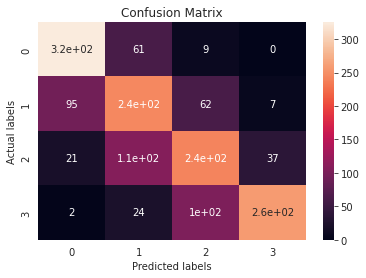

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[83 18  4  0]
 [30 33 24  4]
 [10 33 37 12]
 [ 0 10 35 67]]


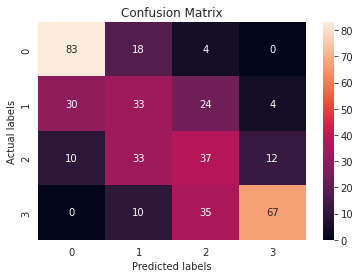

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for KNN with Hyperparameter Tuning

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,KNN_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,KNN_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,KNN_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,KNN_pred_test)
plt.figure()
plt.show()

For training dataset, i found accuracy of 68% and precision of 68% and recall of 67% and f1-score of 67% when comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 69% ,precision equals 69% , recall equals 70% and f1 equals 69%(because of clear cut reson of overfitting)

For testing dataset, i found accuracy of 55% and precision of 55%% and recall of 56% and f1-score of 55% which is an improvement comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 53%,precision equals 53%, recall equals 56%and f1 equals 55%


## **Implementing Random Forest Model** 
(with Hyperparameter Tuning)

In [ ]:
# Random Forest implementation
from sklearn.ensemble import RandomForestClassifier

print(".....Random Forest Classifier.....")
print('\n')

Ran_for = RandomForestClassifier()

Ran_for.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

Ran_for_pred_train = Ran_for.predict(X_train)   # Prediction for train dataset
Ran_for_pred_test = Ran_for.predict(X_test)     # Prediction for test dataset

.....Random Forest Classifier.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 : 1.0


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.865
Recall : 0.865
Precision : 0.8680222398146927
F1 : 0.8659239500536243


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


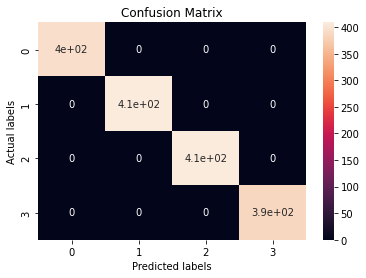

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[100   5   0   0]
 [  6  76   9   0]
 [  0  10  74   8]
 [  0   0  16  96]]


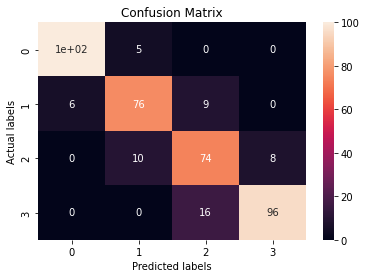

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for Random Forest

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,Ran_for_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,Ran_for_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,Ran_for_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,Ran_for_pred_test)
plt.figure()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)


# Selecting Hyperparameters
params_dict = {
              'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5],
              'min_samples_split': [5,10,15],
              'n_estimators': [100,200,300]
              }

# Using Randomized Search CV
Ran_for_model = RandomizedSearchCV(estimator = Ran_for,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

Ran_for_model.fit(X_train,Y_train)

print(Ran_for_model.best_estimator_)    # Getting the best Estimator
print("\n")
Ran_for_optimal = Ran_for_model.best_estimator_


# Predictions of Training and Testing Dasets

Ran_for_pred_train = Ran_for_optimal.predict(X_train)   # Prediction for train dataset
Ran_for_pred_test = Ran_for_optimal.predict(X_test)     # Prediction for test dataset

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=9, min_sam

##### Which hyperparameter optimization technique have you used and why?

RandomSearchCV is used because it is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

##### The improvement that is seen and getting the improvement with updates Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.995625
Recall : 0.995625
Precision : 0.995635681913054
F1 : 0.9956279971304548


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.88
Recall : 0.88
Precision : 0.881012824057616
F1 : 0.880145218338366


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[393   2   0   0]
 [  0 406   3   0]
 [  0   2 406   0]
 [  0   0   0 388]]


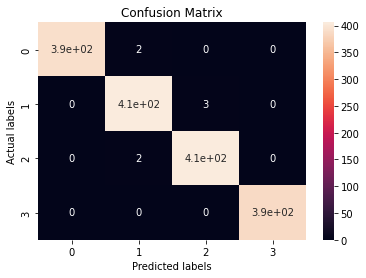

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[100   5   0   0]
 [  8  75   8   0]
 [  0   7  77   8]
 [  0   0  12 100]]


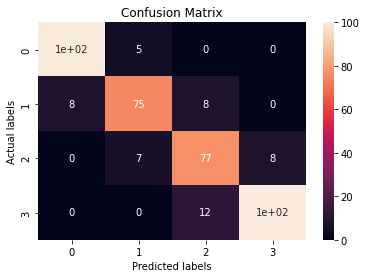

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for Random Forest

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,Ran_for_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,Ran_for_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,Ran_for_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,Ran_for_pred_test)
plt.figure()
plt.show()

For training dataset, i found accuracy of 99% and precision of 99% and recall of 99% and f1-score of 99% when comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 100%,precision equals 100%, recall equals 100% and f1 equals 100%(almost similar before and after)

For testing dataset, i found accuracy of 88% and precision of 88% and recall of 88% and f1-score of 88% which is an improvement comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 86%,precision equals 86%, recall equals 86% and f1 equals 86%


## **Implementing XGBoost Model**
(with Hyperparameter Tuning)

In [ ]:
# XGBoost implementation
from xgboost import XGBClassifier

print(".....Extreme Gradient Boosting Classifier.....")
print('\n')

XGB = XGBClassifier()
XGB.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

XGB_pred_train = XGB.predict(X_train)   # Prediction for train dataset
XGB_pred_test = XGB.predict(X_test)     # Prediction for test dataset



.....Extreme Gradient Boosting Classifier.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.983125
Recall : 0.983125
Precision : 0.9832962365453173
F1 : 0.9831604138119496


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.895
Recall : 0.895
Precision : 0.8973926092897213
F1 : 0.8957321770847679


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[393   2   0   0]
 [  3 399   7   0]
 [  0   7 401   0]
 [  0   0   8 380]]


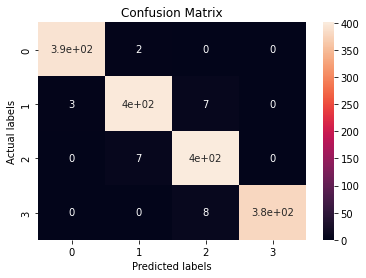

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[ 99   6   0   0]
 [  3  82   6   0]
 [  0  10  76   6]
 [  0   0  11 101]]


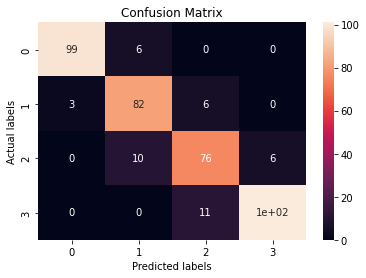

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for XGBoost

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,XGB_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,XGB_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,XGB_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,XGB_pred_test)
plt.figure()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)


# Selecting Hyperparameters
params_dict = {
              'max_depth': [5,6,7,8,9,10],
              'min_samples_leaf': [1,2,3,4,5],
              'min_samples_split': [5,10,15],
              'n_estimators': [100,200,300],
              'learning_rate': [0.01,0.05,0.1,0.5]
              }

# Using Randomized Search CV
XGB_model = RandomizedSearchCV(estimator = XGB,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

XGB_model.fit(X_train,Y_train)

print(XGB_model.best_estimator_)    # Getting the best Estimator
print("\n")
XGB_optimal = XGB_model.best_estimator_


# Predictions of Training and Testing Dasets

XGB_pred_train = XGB_optimal.predict(X_train)   # Prediction for train dataset
XGB_pred_test = XGB_optimal.predict(X_test)     # Prediction for test dataset

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=300

##### The hyperparameter optimization technique that is used and why?

RandomSearchCV is used because it is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

##### The improvement that is seen and getting the improvement with updates Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 : 1.0


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.9125
Recall : 0.9125
Precision : 0.9141708637746695
F1 : 0.9128282358498103


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


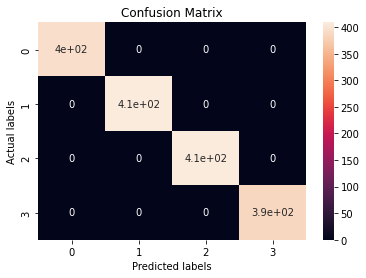

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[100   5   0   0]
 [  4  85   2   0]
 [  0   7  80   5]
 [  0   0  12 100]]


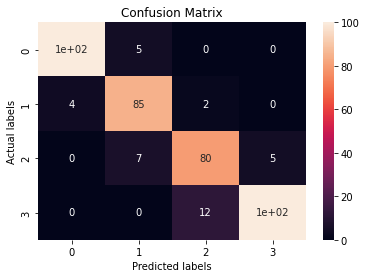

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for XGBoost with Hyperparameter Tuning

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,XGB_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,XGB_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,XGB_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,XGB_pred_test)
plt.figure()
plt.show()

For training dataset, i found accuracy of 100% and precision of 100% and recall of 100% and f1-score of 100% when comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 98%,precision equals 98%, recall equals 98% and f1 equals 

For testing dataset, i found accuracy of 91% and precision of 91% and recall of 91% and f1-score of 91% which is an improvement comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 89%,precision equals 89%, recall equals 89% and f1 equals 89%.


## **Implementing SVM Model**
(with Hyperparameter Tuning)

In [ ]:
# SVM implementation
from sklearn.svm import SVC

print(".....Support Vector Machine Classifier.....")
print('\n')

SVM = SVC(decision_function_shape = 'ovo', probability = True)
SVM.fit(X_train, Y_train)

# Predictions of Training and Testing Dasets

SVM_pred_train = SVM.predict(X_train)   # Prediction for train dataset
SVM_pred_test = SVM.predict(X_test)     # Prediction for test dataset


.....Support Vector Machine Classifier.....




#### 1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.983125
Recall : 0.983125
Precision : 0.9832655444682554
F1 : 0.9831516164776279


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.8925
Recall : 0.8925
Precision : 0.8955607116023779
F1 : 0.893295624471189


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[391   4   0   0]
 [  3 401   5   0]
 [  0   4 402   2]
 [  0   0   9 379]]


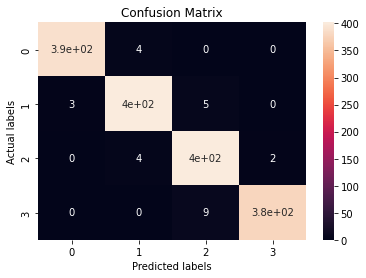

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[ 98   7   0   0]
 [  5  81   5   0]
 [  0  13  75   4]
 [  0   0   9 103]]


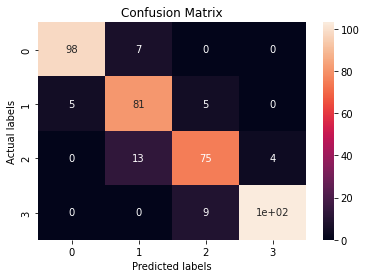

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for SVM

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,SVM_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,SVM_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,SVM_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,SVM_pred_test)
plt.figure()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., RandomSearch CV)


# Selecting Hyperparameters
params_dict = {'C': [0.01,0.1,1,10,100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf','poly','sigmoid']}

# Using Randomized Search CV
SVM_model = RandomizedSearchCV(estimator = SVM,
                       param_distributions= params_dict,
                       cv = 5, verbose=2, scoring='accuracy')

SVM_model.fit(X_train,Y_train)

print(SVM_model.best_estimator_)    # Getting the best Estimator
print("\n")
SVM_optimal = SVM_model.best_estimator_


# Predictions of Training and Testing Dasets

SVM_pred_train = SVM_optimal.predict(X_train)   # Prediction for train dataset
SVM_pred_test = SVM_optimal.predict(X_test)     # Prediction for test dataset

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.3s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ....................C=10, gamma=0.1, ke

##### The hyperparameter optimization technique that is used and why?

RandomSearchCV is used because it is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

##### The improvement that is seen and getting the improvement with updates Evaluation metric Score Chart.

Evaluation metrices for the Training Data


Accuracy : 0.92375
Recall : 0.92375
Precision : 0.9262741992047009
F1 : 0.9243088725354494


------------------------------------------------------------
------------------------------------------------------------


Evaluation metrices for the Testing Data


Accuracy : 0.9175
Recall : 0.9175
Precision : 0.923275530410184
F1 : 0.9187482886944701


------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Training Data


[[367  28   0   0]
 [ 14 376  19   0]
 [  0  21 381   6]
 [  0   0  34 354]]


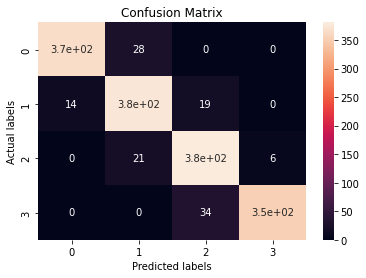

<Figure size 432x288 with 0 Axes>



------------------------------------------------------------
------------------------------------------------------------


Confusion metrix for the Testing Data


[[101   4   0   0]
 [  0  86   5   0]
 [  0   8  82   2]
 [  0   0  14  98]]


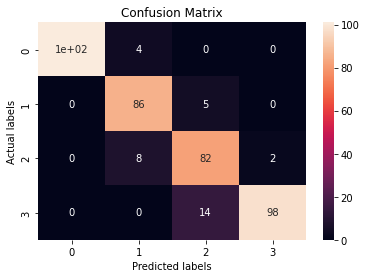

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualizing evaluation Metric Score chart for SVM with Hyperparameter Tuning

# ............Evaluation.............

print("Evaluation metrices for the Training Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_train,SVM_pred_train)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Evaluation metrices for the Testing Data")
print('\n')
# calling evaluation_model function
evaluation_model(Y_test,SVM_pred_test)

print('\n')
print("----"*15)
print("----"*15)
print('\n')

#...............Confusion Matrix..............

print("Confusion metrix for the Training Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_train,SVM_pred_train)
plt.figure()
plt.show()

print('\n')
print("----"*15)
print("----"*15)
print('\n')

print("Confusion metrix for the Testing Data")
print('\n')
# calling confusion metrics function
confuse_matrix(Y_test,SVM_pred_test)
plt.figure()
plt.show()

For training dataset, i found accuracy of 92% and precision of 92% and recall of 92% and f1-score of 92% when comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 98%,precision equals 98%, recall equals 98% and f1 equals 98% (Once again overfitting).

For testing dataset, i found accuracy 91% of and precision of 91% and recall of 92% and f1-score of 91% which is an improvement comparing to what I have got previously(before Hyperparameter Tuning), where the evaluation matrices found were Accuracy equals 89%,precision equals 89%, recall equals 89%and f1 equals 89%.


## Comparing Matrices of all the Models.

In [ ]:
# Dictionary to store Logistic Regression Evaluation Matrices
dict_log_reg =  {'Model' : 'Logistic Regression', 
              'Accuracy Score' : round(accuracy_score(Y_test, log_reg_pred_test),4), 
              'Recall' : round(recall_score(Y_test, log_reg_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, log_reg_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, log_reg_pred_test,average='weighted'),4)
              }

# Dictionary to store Naive Bayes Evaluation Matrices
dict_NB =  {'Model' : 'Naive Bayes', 
              'Accuracy Score' : round(accuracy_score(Y_test, NB_pred_test),4), 
              'Recall' : round(recall_score(Y_test, NB_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, NB_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, NB_pred_test,average='weighted'),4)
              } 

# Dictionary to store KNN Evaluation Matrices
dict_KNN =  {'Model' : 'KNN', 
              'Accuracy Score' : round(accuracy_score(Y_test, KNN_pred_test),4), 
              'Recall' : round(recall_score(Y_test, KNN_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, KNN_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, KNN_pred_test,average='weighted'),4)
              }  

# Dictionary to store Random Forest Evaluation Matrices
dict_Ran_for =  {'Model' : 'Random Forest', 
              'Accuracy Score' : round(accuracy_score(Y_test, Ran_for_pred_test),4), 
              'Recall' : round(recall_score(Y_test, Ran_for_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, Ran_for_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, Ran_for_pred_test,average='weighted'),4)
              }

# Dictionary to store XGBoost Evaluation Matrices
dict_XGBoost =  {'Model' : 'XGBoost', 
              'Accuracy Score' : round(accuracy_score(Y_test, XGB_pred_test),4), 
              'Recall' : round(recall_score(Y_test, XGB_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, XGB_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, XGB_pred_test,average='weighted'),4)
              }

# Dictionary to store SVM Evaluation Matrices
dict_SVM =  {'Model' : 'SVM', 
              'Accuracy Score' : round(accuracy_score(Y_test, SVM_pred_test),4), 
              'Recall' : round(recall_score(Y_test, SVM_pred_test,average='weighted'),4), 
              'Precision' : round(precision_score(Y_test, SVM_pred_test,average='weighted'),4),
              'F1' : round(f1_score(Y_test, SVM_pred_test,average='weighted'),4)
              }

# Data Frame storing the Matrices of all the Models 
models_df = pd.DataFrame([dict_log_reg,dict_NB,dict_KNN,dict_Ran_for,dict_XGBoost,dict_SVM])
models_df.sort_values(by=['Accuracy Score'], ascending=False, inplace=True)
models_df

,Model,Accuracy Score,Recall,Precision,F1
0,Logistic Regression,0.9750,0.9750,0.9759,0.9750
5,SVM,0.9175,0.9175,0.9233,0.9187
4,XGBoost,0.9125,0.9125,0.9142,0.9128
3,Random Forest,0.8800,0.8800,0.8810,0.8801
1,Naive Bayes,0.7975,0.7975,0.8061,0.7994
2,KNN,0.5375,0.5375,0.5603,0.5425


### 1. Which Evaluation metrics should be considered for a positive business impact and why?

Actually every Evaluation Matrices is having its own advantages. In our case we have made the use of Confusion Matrix that itself includes Accuracy,Precision and Recall so it is recommendable. The main reason for using a confusion matrix is that it is a remarkable approach for evaluating a classification model. It provides accurate insight into how correctly the model has classified the classes depending upon the data fed or how the classes are misclassified. 

### 2. Which ML model did we choose from the above created models as the final prediction model and why?

For our dataset Logistic Regression has proven to be the best it mainly gives Good accuracy for many simple data sets and it performs well when the dataset is linearly separable(as in our case).Also, it can be easily extended to multiple classes(multinomial regression) and a natural probabilistic view of class predictions. 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

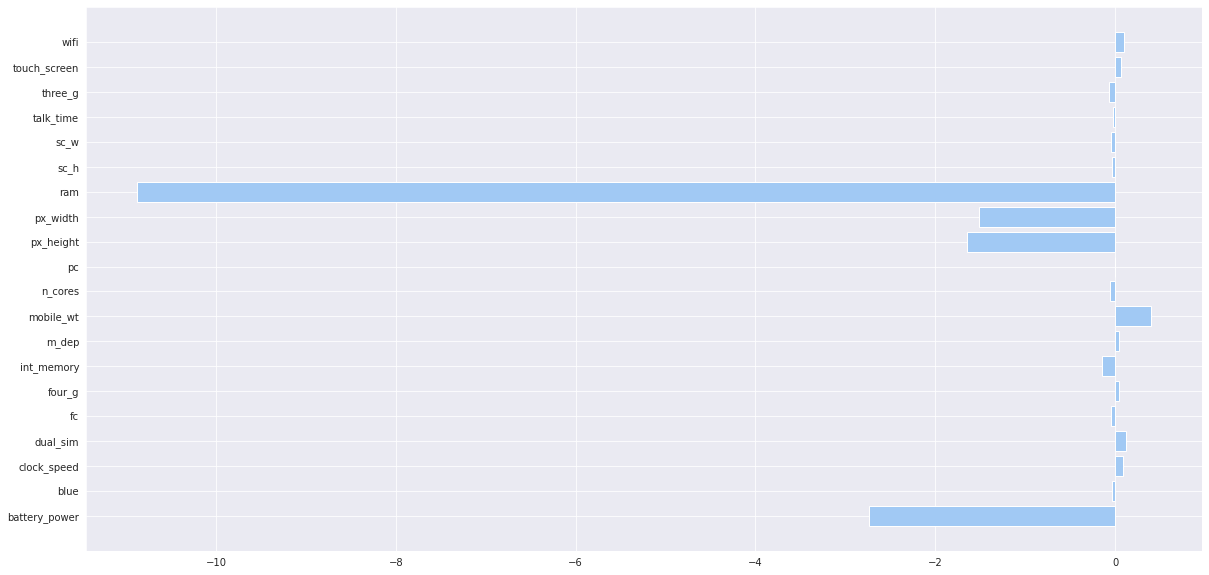

In [ ]:
plt.figure(figsize = (20,10))
plt.barh(X.columns,log_reg.coef_[0])
plt.title("")
plt.show()

# **Conclusion**


*   Data Wrangling and Data Visualization has provided the best idea about the features involved in the datset.

*   We are fortunate that the dataset was almost a cleaned one with no null values present or duplicate records found, it helped in maintaining the correct pace.

*   Most of the categorical features had a similar distribution or count except the feature 'three_g'. There were very few records for mobile phones which doesn't support 3G. 

*   Most of the numerical features followed an uniform distribution except few features like front camera, pixel resolution height and screen width which had a right skewed distribution.

*   **Based on to our main objective to predict the Mobile Price Range. Logistic Regression is the best performing model, out off all the other models used  namely Naive bayes, Knn, Random Forest,XGBoost and SVM.**

*   Knn model is the worst performing models for our dataset

*   Tree based models (XGBoost and Random Forest in our case) are by far good performing models while dealing with our dataset because of its ability to stay insulated from the effect of worst performing features. Random Forest Classifier and XGBoost when applied with cross validation and hyperparameter tuning give far better results.





## **Understanding how this project is useful to stakeholders.**

Mobile phone has become a common commodity and usually the most common purchased item. Thousands types of mobiles are released every year with new features, new specification and new designs. So the question what is the real price of the mobile and to estimate the price of the mobile within the market for optimal marketing and successful launch of the product. Price has become a major factor for development of any product and its sustainability in the
market. Similarly Mobile prices also impacts the marketing of the mobile and its popularity with the other competitors. 

With the available specifications and desired designs, at what price it comes is also an important factor to survive within the market(as discussed above). Customer usually seeks whether they are able to buy the phone coming with the specification of their requirement at an estimated price or not. So estimating the price is an important factor before releasing the mobile and also to know about the market and competitors.

In this Prediction, the algorithm reduce the complexity and also identify the major features and get the best comparison within the data .This Tool is used to find the best price with maximum specifications.Since there are many multiple
variables considered to get the précised results of the price and other features of the mobile,these algorithms will help the buyer, the marketer and the developer to get precise information from historical data of mobile phones and help them to decide which price range is fine and satisfactory.It also gives the ability to make more informed business decisions and develop data-driven strategies.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***